# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów. 
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [1]:
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from scipy import signal


# Obrazki
if not os.path.exists("jet.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/jet.png --no-check-certificate
if not os.path.exists("kw.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/kw.png --no-check-certificate
if not os.path.exists("moon.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/moon.png --no-check-certificate
if not os.path.exists("lenaSzum.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lenaSzum.png --no-check-certificate
if not os.path.exists("lena.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/lena.png --no-check-certificate
if not os.path.exists("plansza.png") :
    !wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/plansza.png --no-check-certificate


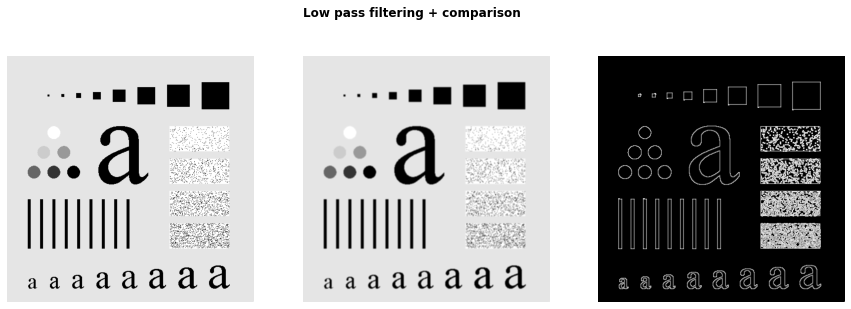

In [2]:
def convolute(img:np.ndarray, kernel:np.ndarray=np.ones((3,3),np.float32)):
    img_k_conv = cv2.filter2D(img, -1, kernel)
    return img_k_conv

def filtration(img:np.ndarray, method, args):
    return method(img, args)

def disp_compare_two(original, processed, title):
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].imshow(original, 'gray'), ax[0].axis('off')
    ax[1].imshow(processed, 'gray'), ax[1].axis('off')
    ax[2].imshow(np.abs(processed - original), 'gray'), ax[2].axis('off')
    fig.suptitle(title, weight='bold')

# 1.
plansza = cv2.imread('plansza.png', cv2.IMREAD_GRAYSCALE)
# 2 i 3.
kernel = np.ones((3,3),np.float32)/9
plansza_smooth = convolute(plansza, kernel)
#plansza_smooth = filtration(plansza, convolute, (kernel)) -> test
disp_compare_two(plansza, plansza_smooth, 'Low pass filtering + comparison')

## Wnioski do powyższego rysunku:
- filtr uśredniający powoduje 'wygładzanie' obrazu - zmiejeszenie ostrości (jeśli nie zastosuje się przemyślanej maski),
- różnice między obrazami pokazują, że zostało usunięte dużo szumów (prostokąty z szumem).

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35. 
Wykorzystaj polecenie `plt.subplot`. 
Przeanalizuj wpływ rozmiaru maski na wynik. 

Text(0.5, 0.98, 'Low-pass filter size dependency on output image')

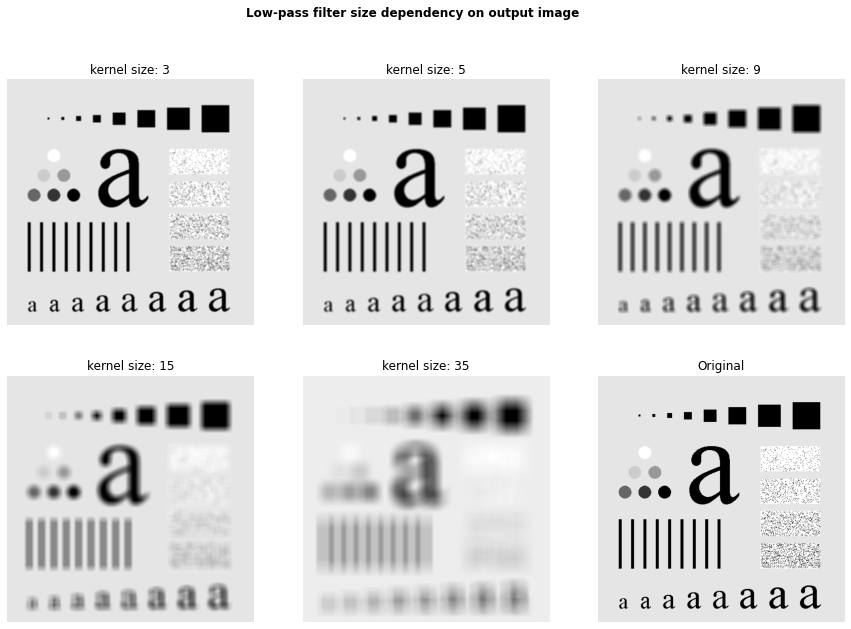

In [3]:
imgs = [convolute(plansza, np.ones((i,i),np.float32)/(i**2)) for i in [3,5,9,15,35]]
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax[0,0].imshow(imgs[0],'gray'), ax[0,0].axis('off'), ax[0,0].set_title('kernel size: 3')
ax[0,1].imshow(imgs[1],'gray'), ax[0,1].axis('off'), ax[0,1].set_title('kernel size: 5')
ax[0,2].imshow(imgs[2],'gray'), ax[0,2].axis('off'), ax[0,2].set_title('kernel size: 9')
ax[1,0].imshow(imgs[3],'gray'), ax[1,0].axis('off'), ax[1,0].set_title('kernel size: 15')
ax[1,1].imshow(imgs[4],'gray'), ax[1,1].axis('off'), ax[1,1].set_title('kernel size: 35')
ax[1,2].imshow(plansza,'gray'), ax[1,2].axis('off'), ax[1,2].set_title('Original')
fig.suptitle('Low-pass filter size dependency on output image', weight='bold')

## Wnioski
- zwiększenie rozmiaru jądra konwolucji powoduje zwiększenie rozmycia w obrazie wynikowym,
- dzięki temu, obszary zaszumione (takie jak prostokąty na planszy) zostają uśrednione i wyglądają na obszary o jednolitym poziomie jasności.

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

Text(0.5, 0.98, 'Low-pass filter size dependency on output image')

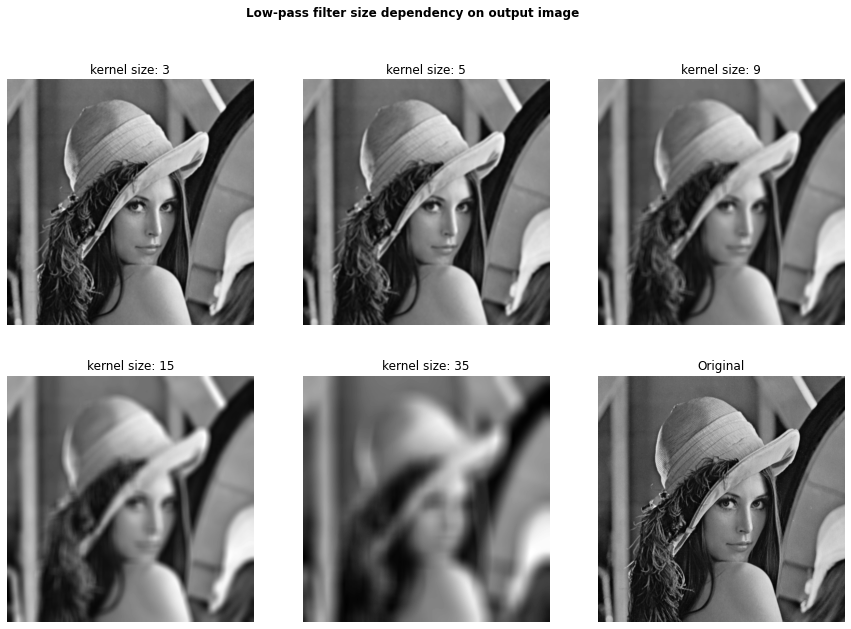

In [4]:
lena = cv2.imread('lena.png', cv2.IMREAD_GRAYSCALE)
imgs = [convolute(lena, np.ones((i,i),np.float32)/(i**2)) for i in [3,5,9,15,35]]
fig, ax = plt.subplots(2,3, figsize=(15,10))
ax[0,0].imshow(imgs[0],'gray'), ax[0,0].axis('off'), ax[0,0].set_title('kernel size: 3')
ax[0,1].imshow(imgs[1],'gray'), ax[0,1].axis('off'), ax[0,1].set_title('kernel size: 5')
ax[0,2].imshow(imgs[2],'gray'), ax[0,2].axis('off'), ax[0,2].set_title('kernel size: 9')
ax[1,0].imshow(imgs[3],'gray'), ax[1,0].axis('off'), ax[1,0].set_title('kernel size: 15')
ax[1,1].imshow(imgs[4],'gray'), ax[1,1].axis('off'), ax[1,1].set_title('kernel size: 35')
ax[1,2].imshow(lena,'gray'), ax[1,2].axis('off'), ax[1,2].set_title('Original')
fig.suptitle('Low-pass filter size dependency on output image', weight='bold')

## Wnioski
- ponownie, zaobserwowaliśmy duże rozmycie

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości. 
Częściowo można go zniwelować poprzez odpowiedni dobór maski. 
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`. 
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

Text(0.5, 0.98, 'Low pass filtering of an image + comparison')

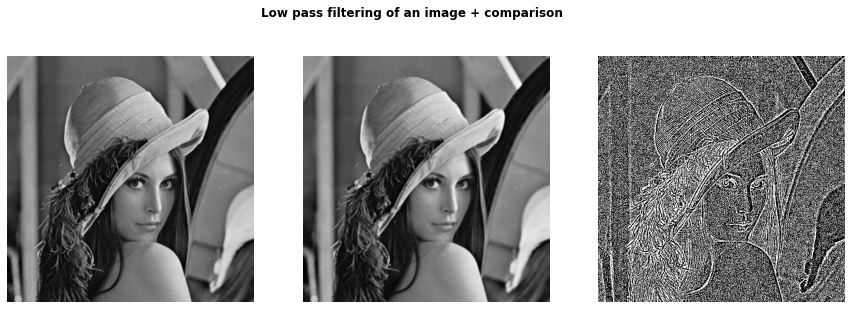

In [5]:
M = np.array([[1, 2, 1],[ 2, 4, 2], [1, 2, 1]])
M = M/np.sum(M)
lena_smooth = convolute(lena, M)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(lena, 'gray'), ax[0].axis('off')
ax[1].imshow(lena_smooth, 'gray'), ax[1].axis('off')
ax[2].imshow(np.abs(lena - lena_smooth), 'gray'), ax[2].axis('off')
fig.suptitle('Low pass filtering of an image + comparison', weight='bold')

## Wnioski:
- maska zaprojektowana tak, jak powyżej sprawdza sie o wiele lepiej
- dzięki powyższej filtracji udało się nam, co widzimy po module różnicy obrazów, usunąć dużą część szumów z oryginalnego obrazu

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa. 
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


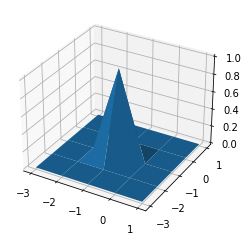

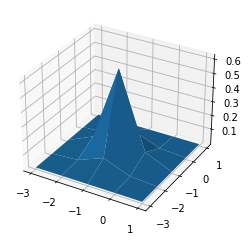

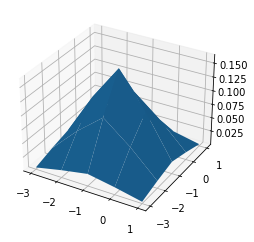

In [6]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum() 
    
    
def mesh(fun, size):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    

    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun
    
    ax.plot_surface(X, Y, Z)
    
    plt.show()
    
_,_,_ = mesh(fgaussian(5,.1), 5), mesh(fgaussian(5,.5), 5), mesh(fgaussian(5,1), 5)

## Wnioski:
- duże odchylenie powoduje, że wartości w masce są do siebie bardziej zbliżone, a bardziej precyzyjnie, że powierzchnia jest bardziej gładka

In [7]:
r = np.arange(start=.1, stop=1.41, step=.35)
blur_custom = np.array([convolute(lena, fgaussian(5, i)) for i in r])
blur_cv2 = np.array([cv2.GaussianBlur(lena, (5, 5), sigmaX=i, sigmaY=i) for i in r])
mse_custom = np.array([np.square(lena - blur_custom[i]).mean(axis=None) for i in np.arange(start=0, stop=4, step=1)])
mse_cv2 = np.array([np.square(lena - blur_cv2[i]).mean(axis=None) for i in np.arange(start=0, stop=4, step=1)])

Text(0.5, 0.98, 'Gaussian blur effect + comparison of custom method with cv2 method\nmask size: 5')

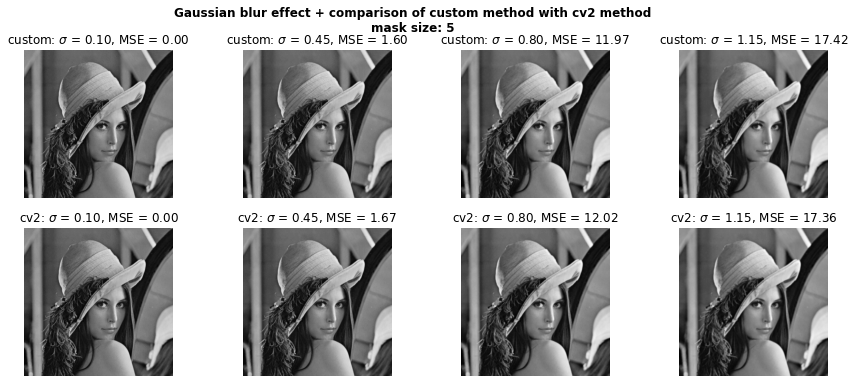

In [8]:
fig, ax = plt.subplots(2,4, figsize=(15,6))
for i in np.arange(start=0, stop=4, step=1):
    ax[0,i].imshow(blur_custom[i], 'gray'), ax[0,i].axis('off'), ax[0,i].set_title('custom: $\sigma$ = {:.2f}, MSE = {:.2f}'.format(r[i], mse_custom[i]))
    ax[1,i].imshow(blur_cv2[i], 'gray'), ax[1,i].axis('off'), ax[1,i].set_title('cv2: $\sigma$ = {:.2f}, MSE = {:.2f}'.format(r[i], mse_cv2[i]))
fig.suptitle('Gaussian blur effect + comparison of custom method with cv2 method\nmask size: 5', weight='bold')

## Wnioski:
- filtr gaussa nie powoduje rozmycia obrazu, a przynajmniej nie na takim poziomie jak zwykły filtr dolnopasmowy,
- MSE dla małych $\sigma$ jest (o dziwo) lepsze, bo mniejsze, dla metody customowej. Za to metoda z OpenCV sprawia się lepiej dla większych ochyleń.

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


Text(0.5, 0.98, 'Median filtering of an image + comparison')

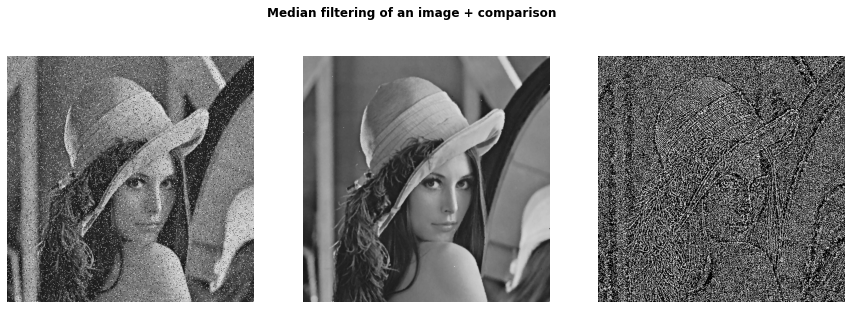

In [9]:
lenaNoise = cv2.imread('lenaSzum.png', cv2.IMREAD_GRAYSCALE)
lenaNoise_median = cv2.medianBlur(lenaNoise, 3)
fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(lenaNoise, 'gray'), ax[0].axis('off')
ax[1].imshow(lenaNoise_median, 'gray'), ax[1].axis('off')
ax[2].imshow(np.abs(lenaNoise_median - lenaNoise), 'gray'), ax[2].axis('off')
fig.suptitle('Median filtering of an image + comparison', weight='bold')

## Wnioski:
- filtr medianowy działa niesamowicie dobrze dla zaszumionego obrazu,
- dodatkowo daje on detekcję krawędzi (tutaj słaba - przez szum)

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

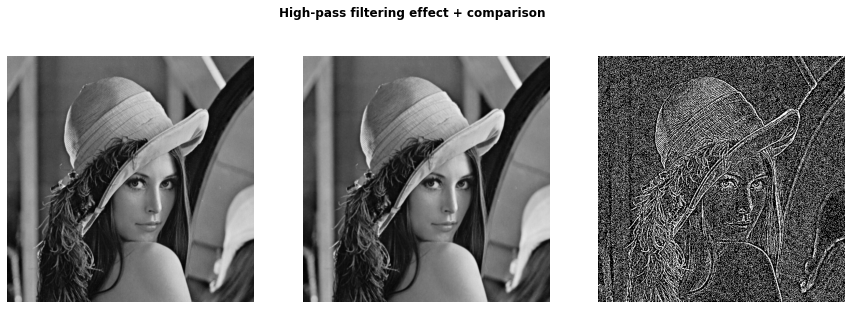

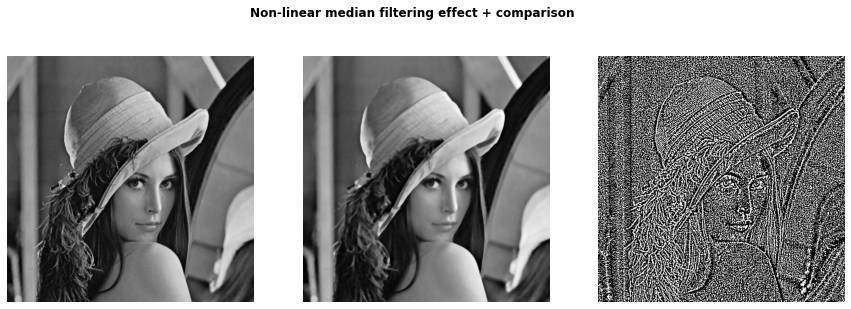

In [10]:
lena_avg = convolute(lena, fgaussian(5, .5))
lena_median = filtration(lena, cv2.medianBlur, 5)
disp_compare_two(lena, lena_avg, 'High-pass filtering effect + comparison')
disp_compare_two(lena, lena_median, 'Non-linear median filtering effect + comparison')

## Wnioski:
- lepsze zachowanie krawędzi daje filtracja medianowa, ponieważ na obrazie przedstawiającym różnicę oryginału i filtracji widzimy krawędzie na czarno,
- oznacza to, że krawędzie nie zostaną odfiltrowane,
- ciężko to zaobserwować na obrazie wynikowym, ale obraz różnicy dobrze to pokazuje

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

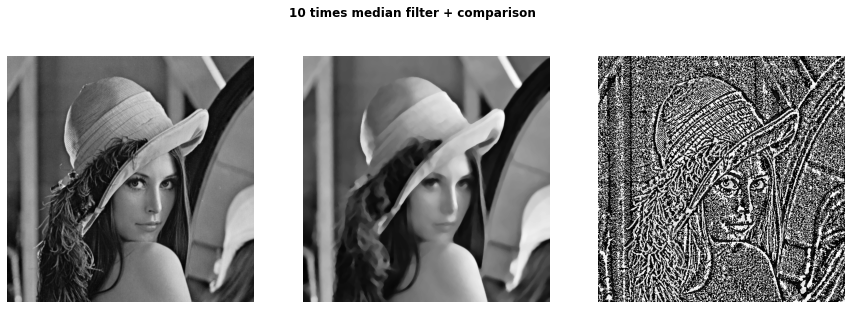

In [11]:
lena_median10 = lena
for _ in np.arange(start=0, stop=9, step=1):
    lena_median10 = filtration(lena_median10, cv2.medianBlur, 5)
disp_compare_two(lena, lena_median10, '10 times median filter + comparison')

## Wnioski:
- po wielokrotnym zastosowaniu filtracji medianowej, w obrazie kolory obiektów zostały ujednolicone, ale nie zmieszały się z tłem

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M = 
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje. 
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach. 

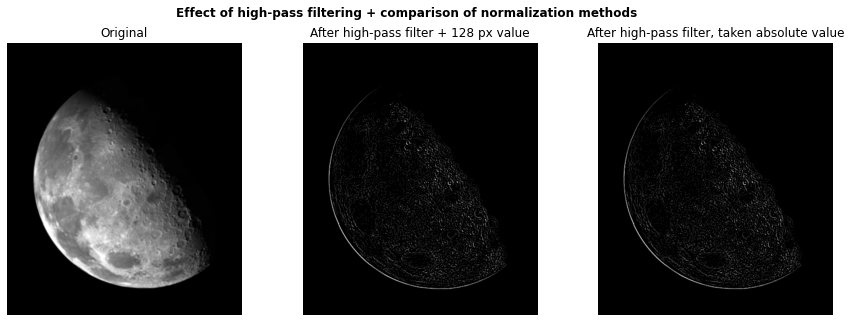

In [12]:
moon = cv2.imread('moon.png', cv2.IMREAD_GRAYSCALE)
M = np.array([[0,1,0],[1,-4,1],[0,1,0]])/9

def two_normalizations(img, M, disp=False):
    img_highpass = cv2.filter2D(img, -1, M)
    img_highpass_128 = img_highpass + 128
    img_highpass_abs = np.abs(img_highpass)
    if disp:
        fig, ax = plt.subplots(1,3, figsize=(15,5))
        ax[0].imshow(img, 'gray'), ax[0].axis('off'), ax[0].set_title('Original')
        ax[1].imshow(img_highpass_128, 'gray'), ax[1].axis('off'), ax[1].set_title('After high-pass filter + 128 px value')
        ax[2].imshow(img_highpass_abs, 'gray'), ax[2].axis('off'), ax[2].set_title('After high-pass filter, taken absolute value')
        fig.suptitle('Effect of high-pass filtering + comparison of normalization methods', weight='bold')
    else:
        return img_highpass, img_highpass_128, img_highpass_abs

two_normalizations(moon, M, True)

## Wnioski:
- obie normalizacje dają dobry efekt,
- można je stosować do różnych przypadków.

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



Text(0.5, 0.98, 'Original image, sum and absolute difference')

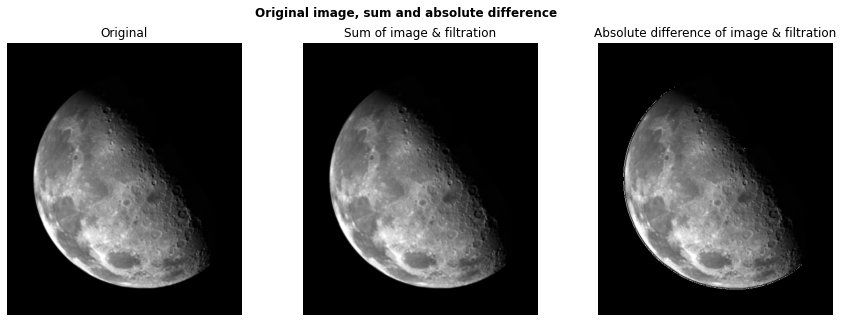

In [13]:
moon_highpass,_,_ = two_normalizations(moon, M)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(moon, 'gray'), ax[0].axis('off'), ax[0].set_title('Original')
ax[1].imshow(moon + moon_highpass, 'gray'), ax[1].axis('off'), ax[1].set_title('Sum of image & filtration')
ax[2].imshow(np.abs(moon - moon_highpass), 'gray'), ax[2].axis('off'), ax[2].set_title('Absolute difference of image & filtration')
fig.suptitle('Original image, sum and absolute difference', weight='bold')

## Wnioski:
- wynik sumy obrazów wygląda tak samo, jak obraz wejściowy,
- wynik modułu z różnicy pozostawia artefakty na krawiędzi - laplasjan będzie je wykrywał

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela. 

In [14]:
kw = cv2.imread('kw.png', cv2.IMREAD_GRAYSCALE)
def grad_filtration(img, G1, G2):
    img_G1 = two_normalizations(img, G1)
    img_G2 = two_normalizations(img, G2)
    fig, ax = plt.subplots(2,3, figsize=(15,10))
    ax[0,0].imshow(img_G1[0], 'gray'), ax[0,0].axis('off'), ax[0,0].set_title('High pass filter effect')
    ax[1,0].imshow(img_G2[0], 'gray'), ax[1,0].axis('off')
    ax[0,1].imshow(img_G1[1], 'gray'), ax[0,1].axis('off'), ax[0,1].set_title('normalization + 128')
    ax[1,1].imshow(img_G2[1], 'gray'), ax[1,1].axis('off')
    ax[0,2].imshow(img_G1[2], 'gray'), ax[0,2].axis('off'), ax[0,2].set_title('normalization abs')
    ax[1,2].imshow(img_G2[2], 'gray'), ax[1,2].axis('off')
    fig.suptitle('Comparison of two masks')

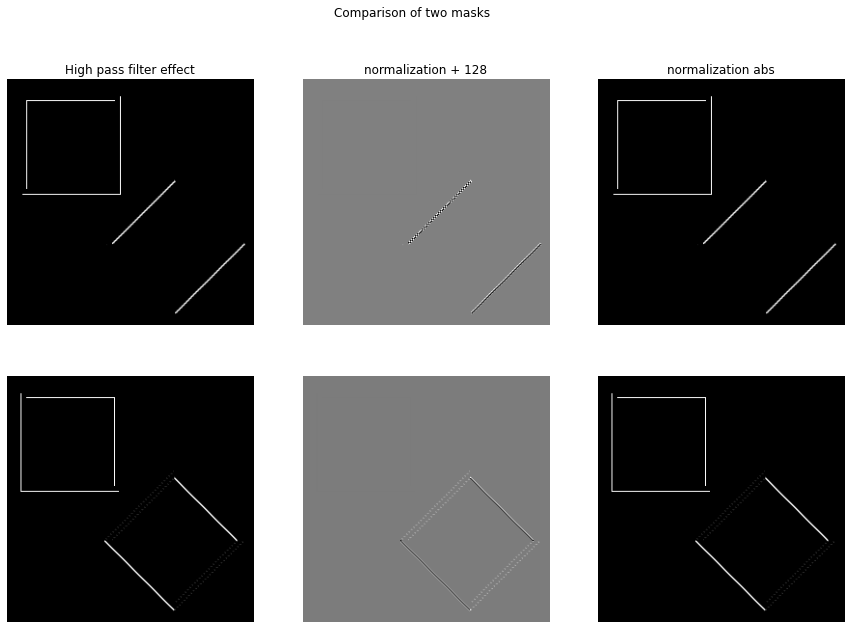

In [15]:
R1 = np.array([[0,0,0], [-1,0,0], [0,1,0]])
R2 = np.array([[0,0,0], [0,0,-1], [0,1,0]])

grad_filtration(kw, R1, R2)

## Wnioski:
- gradienty Robertsa nadają się do filtracji po skosach, ale nie pionach i poziomach

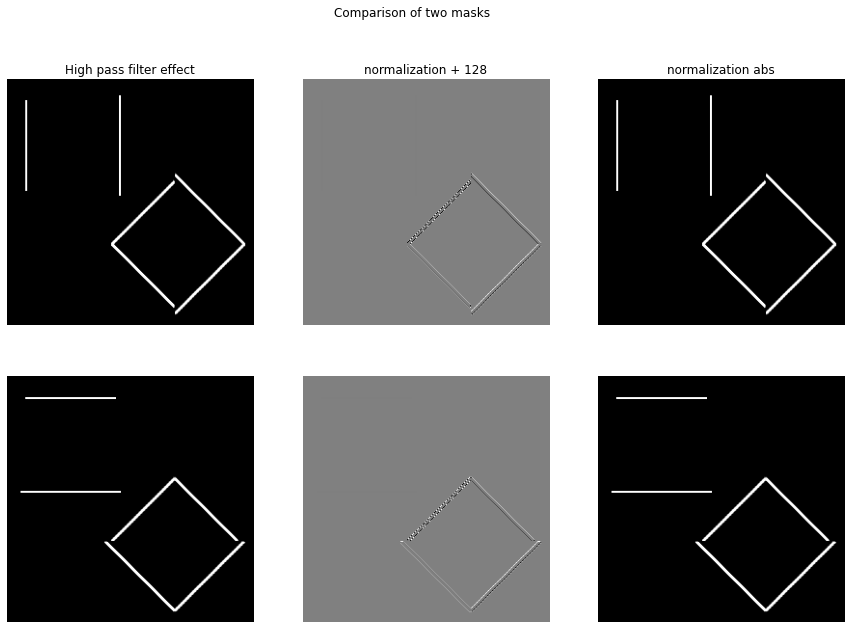

In [16]:
P1 = np.array([[-1,0,1], [-1,0,1], [-1,0,1]])
P2 = P1.T

grad_filtration(kw, P1, P2)

## Wnioski:
- filtracja maskami Prewitta daje całkiem dobre wyniki, jednak tylko w danym kierunku działania

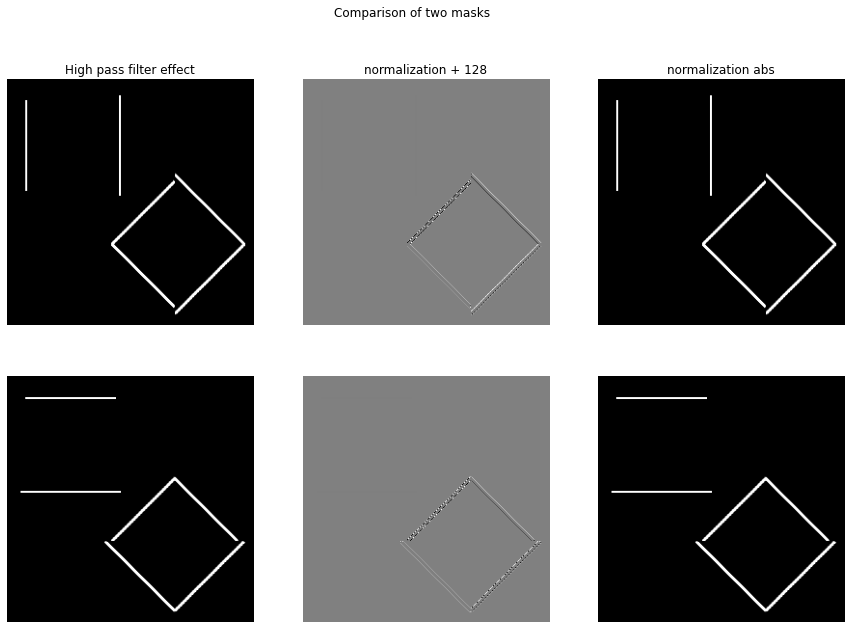

In [17]:
S1 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
S2 = S1.T

grad_filtration(kw, S1, S2)

## Wnioski:
- maski Sobela dają kompletne wyniki,
- czasami brakuje jedynie połączeń krawędzi

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



In [18]:
def combined_filtration_sqrt(img, s):
    img = np.array(img, dtype=float)
    s1, s2 = s, s.T
    ow = np.sqrt(np.power(cv2.filter2D(img, -1, s1), 2) + np.power(cv2.filter2D(img, -1, s2), 2))
    ow = np.array(ow, dtype=int)
    return ow

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia). 
Zaimplementuj tę wersję. 

In [19]:
def combined_filtration_abs(img, s):
    s1, s2 = s, s.T
    ow = np.abs(cv2.filter2D(img, -1, s1), dtype=int) + np.abs(cv2.filter2D(img, -1, s2), dtype=int)
    return ow

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

Text(0.5, 0.98, 'Comparison of combined filters')

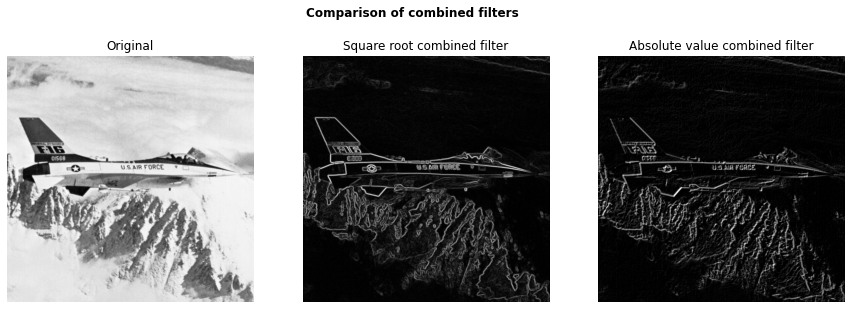

In [20]:
jet = cv2.imread('jet.png', cv2.IMREAD_GRAYSCALE)

jet_sqrt = combined_filtration_sqrt(jet, S1)
jet_abs = combined_filtration_abs(jet, S1)

fig, ax = plt.subplots(1,3, figsize=(15,5))
ax[0].imshow(jet, 'gray'), ax[0].axis('off'), ax[0].set_title('Original')
ax[1].imshow(jet_sqrt, 'gray'), ax[1].axis('off'), ax[1].set_title('Square root combined filter')
ax[2].imshow(jet_abs, 'gray'), ax[2].axis('off'), ax[2].set_title('Absolute value combined filter')
fig.suptitle('Comparison of combined filters', weight='bold')

## Wnioski:
- między 'alternatywnymi' metodami występują pewne różnice, jeśli chodzi o obraz wynikowy,
- filtr z pierwiastkiem kwadratowym, dał w wyniku wyraźniejsze krawędzie, jednak mniej szczegółów,
- filtr z modułem daje więcej szczegółów, jednak nie wykrywa niektórych ważnych krawędzi